In [5]:
!pip install zipcodes

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/719.6 kB ? eta -:--:--
                                              10.2/719.6 kB ? eta -:--:--
     -                                       30.7/719.6 kB 1.4 MB/s eta 0:00:01
     -                                       30.7/719.6 kB 1.4 MB/s eta 0:00:01
     --                                    41.0/719.6 kB 245.8 kB/s eta 0:00:03
     --                                    41.0/719.6 kB 245.8 kB/s eta 0:00:03
     --                                    41.0/719.6 kB 245.8 kB/s eta 0:00:03
     --                                    41.0/719.6 kB 245.8 kB/s eta 0:00:03
     ---                                   61.4/719.6 kB 164.1 kB/s eta 0:00:05
     ----                                  92.2/719.6 kB 238.1 kB/s eta 0:00:03
     ----                                  92.2/719.6 kB 238.1 kB/s eta 0:00:03
     ----                                  92.2/719.6 k


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install basemap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression,LinearRegression
import zipcodes as zp
from warnings import filterwarnings
filterwarnings("ignore")

In [27]:
data = pd.read_csv("E:/Programming/MLMomeni/ML/files/Bank_Personal_Loan_Modelling(1).csv")
df = pd.DataFrame(data)
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##### experience : years of professional work
##### education : 1 = UnderGrade        2  =  Graduate        3  =  Advanced
##### morgage : value of their house in bank (if 0 means they aint got one)
##### personal_loan (target) : did they accept the last campgain


In [28]:
# for negative Experience use Abs 

In [29]:
df['Experience'] = abs(df['Experience'])

In [30]:
df.drop(['ID'], axis = 1, inplace = True)
df.drop(['CCAvg'], axis = 1, inplace = True)

### missing value

In [31]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### noise

#### categorical

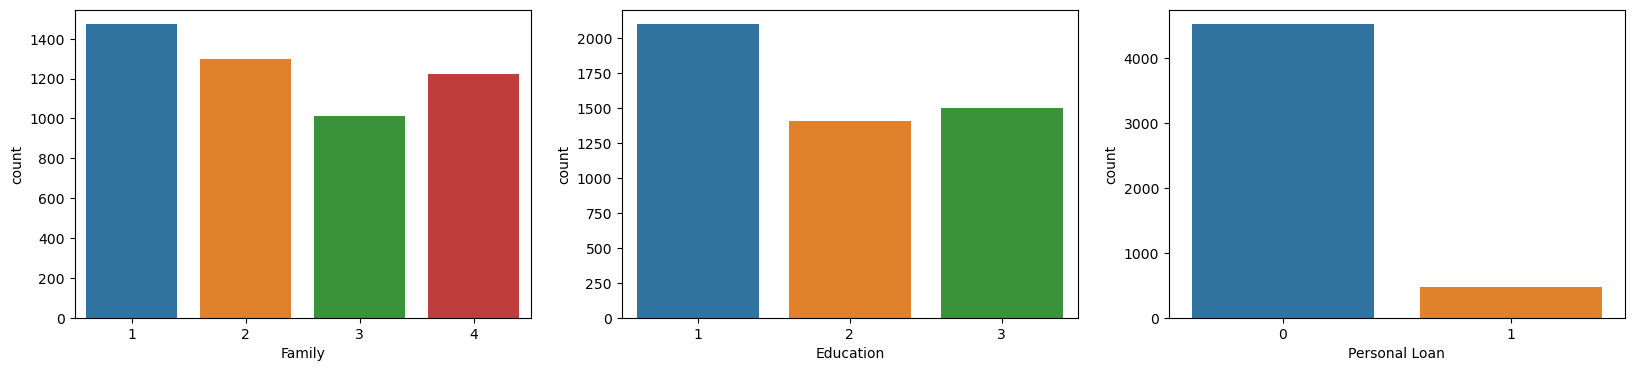

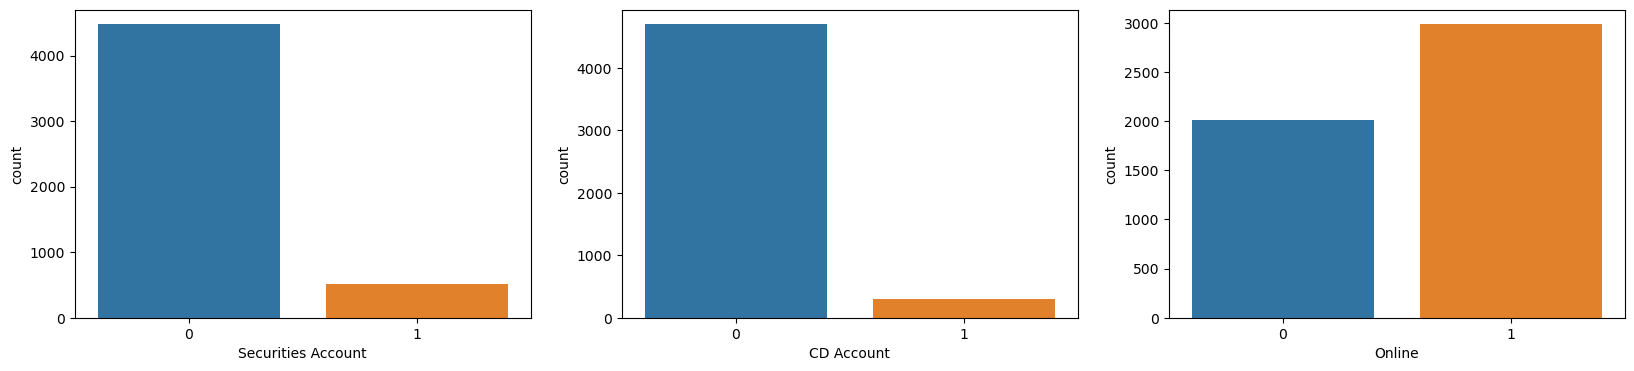

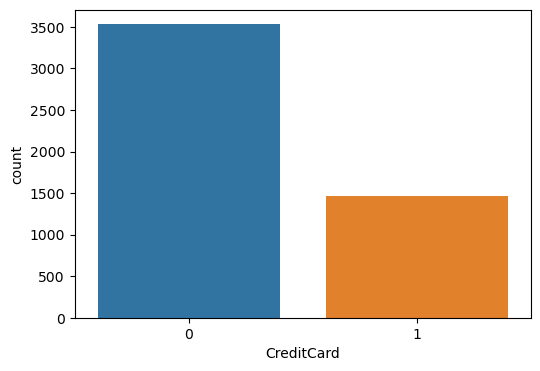

In [32]:
categorical = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
i = 0
while i < 8:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3,1)
    sns.countplot(x = categorical[i], data = df)
    i += 1
    if i == 7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x = categorical[i], data = df)
    i += 1
    plt.subplot(1,3,3)
    sns.countplot(x = categorical[i], data = df)
    i += 1
    plt.show()

### numerical

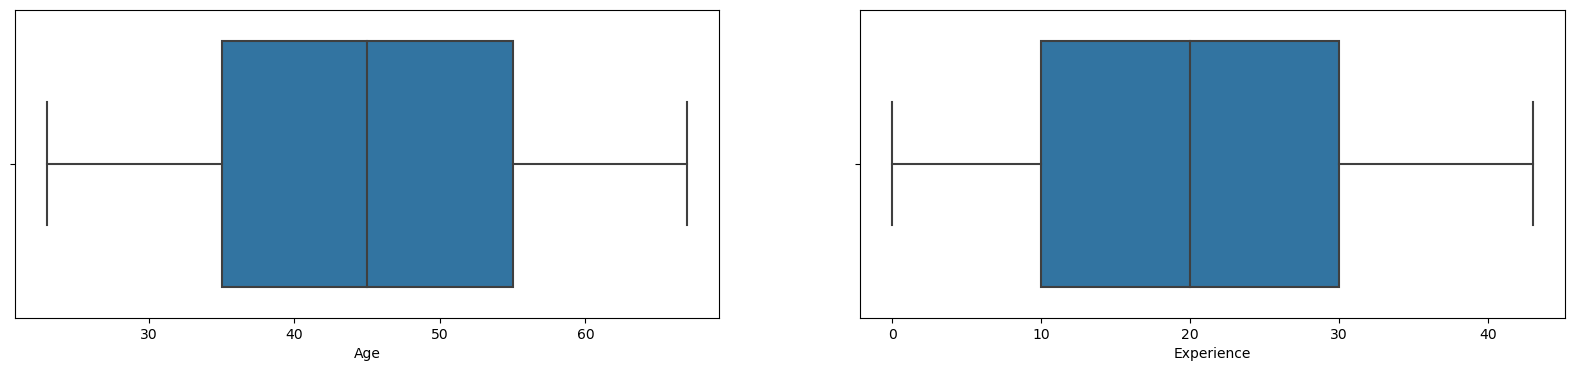

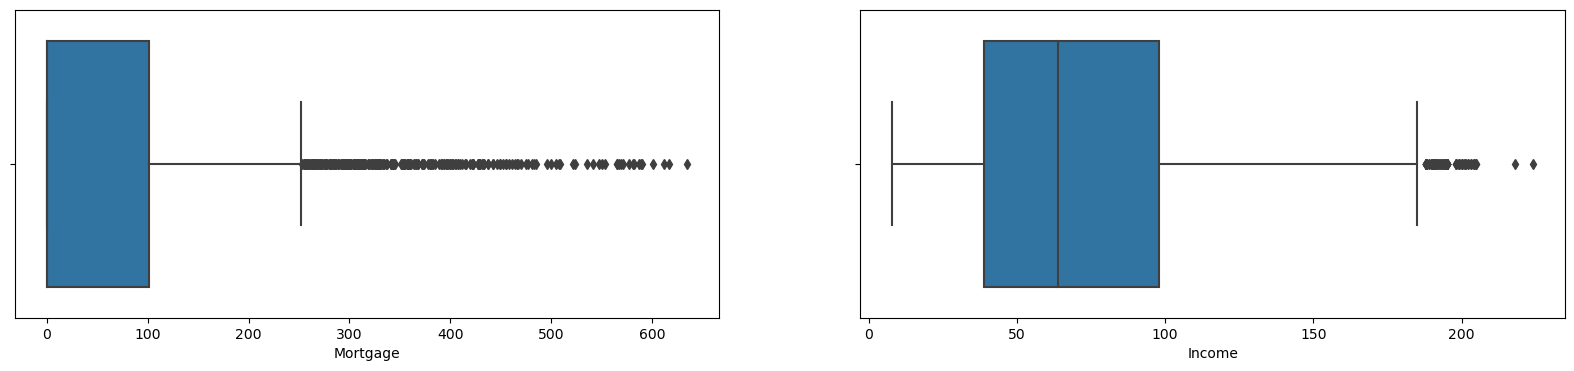

In [33]:
numerical = ['Age', 'Experience', 'Mortgage', 'Income']
i = 0
while i < 4:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,2,1)
    sns.boxplot(x = numerical[i], data = df)
    i += 1
    if i == 4:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x = numerical[i], data = df)
    i += 1
    plt.show()

### zip code

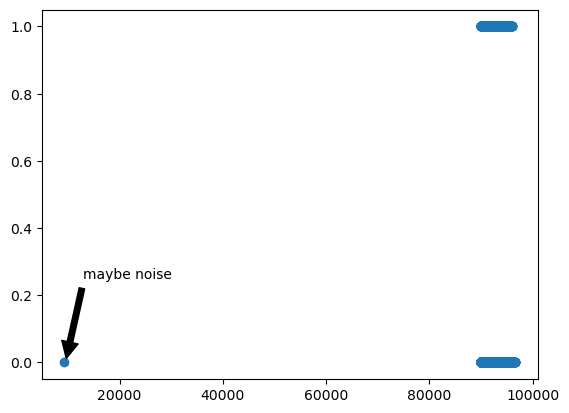

In [35]:
plt.scatter(df['ZIP Code'], df['Personal Loan'])
plt.annotate('maybe noise', xy=(9500,0), xytext=(13000, .25), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [41]:
noisezip = df[df['ZIP Code']<20000]
noisezip

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,3,0,0,0,0,1,1


In [42]:
df.drop(index = 384, inplace = True)

In [44]:
list_zipcode = list(df['ZIP Code'])

In [48]:
country=[]
lat = [] #to latitude 
long = [] # to longitude
for x in list_zipcode:
    my_city_county = zp.matching(str(x))
    if len(my_city_county) ==1:
        County = my_city_county[0].get('county')
        Lat = my_city_county[0].get('lat')
        Long = my_city_county[0].get('long')
    else:
        Country = 'Not Found'
        Lat= np.NaN
        Long = np.NaN
    country.insert(0,County)
    lat.insert(0,Lat)
    long.insert(0,Long)
country.reverse()
lat.reverse()
long.reverse()
# making new columns
df["Place"]= country
df["Latitude"]= lat
df["Longitude"] = long

In [50]:
print(zp.matching(str(92612)) )
df

[{'zip_code': '92612', 'zip_code_type': 'STANDARD', 'active': True, 'city': 'Irvine', 'acceptable_cities': [], 'unacceptable_cities': [], 'state': 'CA', 'county': 'Orange County', 'timezone': 'America/Los_Angeles', 'area_codes': ['714', '949'], 'world_region': 'NA', 'country': 'US', 'lat': '33.6615', 'long': '-117.8217'}]


,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
0,25,1,49,91107,4,1,0,0,1,0,0,0,Los Angeles County,34.1620,-118.0894
1,45,19,34,90089,3,1,0,0,1,0,0,0,Los Angeles County,34.0218,-118.2883
2,39,15,11,94720,1,1,0,0,0,0,0,0,Alameda County,37.8746,-122.2547
3,35,9,100,94112,1,2,0,0,0,0,0,0,San Francisco County,37.7217,-122.4446
4,35,8,45,91330,4,2,0,0,0,0,0,1,Los Angeles County,34.2429,-118.5273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,3,0,0,0,0,1,0,Orange County,33.6473,-117.8409
4996,30,4,15,92037,4,1,85,0,0,0,1,0,San Diego County,32.8668,-117.2482
4997,63,39,24,93023,2,3,0,0,0,0,0,0,Ventura County,34.5210,-119.2477
4998,65,40,49,90034,3,2,0,0,0,0,1,0,Los Angeles County,34.0293,-118.3994


In [51]:
df = df.astype({'Latitude':float, 'Longitude':float})

In [53]:
df.describe(include='all')

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999,4966.000000,4966.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles County,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1104,NaN,NaN
mean,45.337267,20.133627,73.784757,93169.275455,2.396079,1.880776,56.510102,0.096019,0.104421,0.060412,0.596719,0.293859,NaN,35.792110,-120.037847
std,11.464033,11.416124,46.032281,1759.630610,1.147554,0.839804,101.720837,0.294647,0.305836,0.238273,0.490605,0.455574,NaN,2.098821,2.092821
min,23.000000,0.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,32.554700,-124.099400
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,34.003300,-122.148500
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,35.373600,-120.042400
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,37.748700,-118.089400


### Lat = 4966
### long = 4966
### there are 33 missing values

In [55]:
df[df['Place'] =='Not Found']['ZIP Code'].value_counts()

Series([], Name: ZIP Code, dtype: int64)

In [56]:
def highlight_cols(s):
    color = 'yellow'
    return 'background-color :  %s' % color

In [62]:
z92717 = list(df[df['ZIP Code']== 92717].index)
for x in z92717 :
    df["Place"].loc[x]='Irvine'
    df['Latitude'].loc[x]= 33.6462
    df['Longitude'].loc[x] = -117.8398
df[df['ZIP Code']== 92717].style.applymap(highlight_cols, subset = pd.IndexSlice[:,['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
106,43,17,69,92717,4,1,0,0,0,0,1,1,Irvine,33.646200,-117.839800
172,38,13,171,92717,2,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800
184,52,26,63,92717,2,2,0,0,1,0,1,0,Irvine,33.646200,-117.839800
321,44,20,101,92717,3,2,82,1,0,0,0,0,Irvine,33.646200,-117.839800
366,50,24,35,92717,1,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
476,60,34,53,92717,1,2,0,0,1,0,0,1,Irvine,33.646200,-117.839800
695,29,4,115,92717,1,1,0,0,0,0,0,0,Irvine,33.646200,-117.839800
721,49,24,39,92717,1,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1099,30,6,52,92717,3,2,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1189,42,17,115,92717,2,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800


In [63]:
z96651 = list(df[df['ZIP Code']== 96651].index)
for x in z96651 :
    df["Place"].loc[x]='Rudno nad Hronom'
    df['Latitude'].loc[x]= 48.4242
    df['Longitude'].loc[x] = 18.7071
df[df['ZIP Code']== 96651].style.applymap(highlight_cols, subset = pd.IndexSlice[:,['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
630,32,7,35,96651,3,1,108,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
672,51,27,23,96651,1,1,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1426,37,11,60,96651,3,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1653,26,1,24,96651,2,3,123,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
2731,29,5,28,96651,1,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
3525,59,34,13,96651,4,2,0,0,0,0,0,0,Rudno nad Hronom,48.424200,18.707100


In [64]:
z92634 = list(df[df['ZIP Code']== 92634].index)
for x in z92634 :
    df["Place"].loc[x]='Fullerton'
    df['Latitude'].loc[x]= 33.8739
    df['Longitude'].loc[x] = -117.9028
df[df['ZIP Code']== 92634].style.applymap(highlight_cols, subset = pd.IndexSlice[:,['Personal Loan']])

,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
468,34,10,21,92634,1,3,0,0,0,0,1,0,Fullerton,33.873900,-117.902800
780,32,7,42,92634,4,1,0,0,0,0,1,1,Fullerton,33.873900,-117.902800
2218,38,13,9,92634,2,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800
3887,24,2,118,92634,2,1,0,0,1,0,1,0,Fullerton,33.873900,-117.902800
4392,52,27,81,92634,4,2,0,0,0,0,0,0,Fullerton,33.873900,-117.902800


In [65]:
df_for_maping = df[df['Place']!='Rudno nad Hronom']

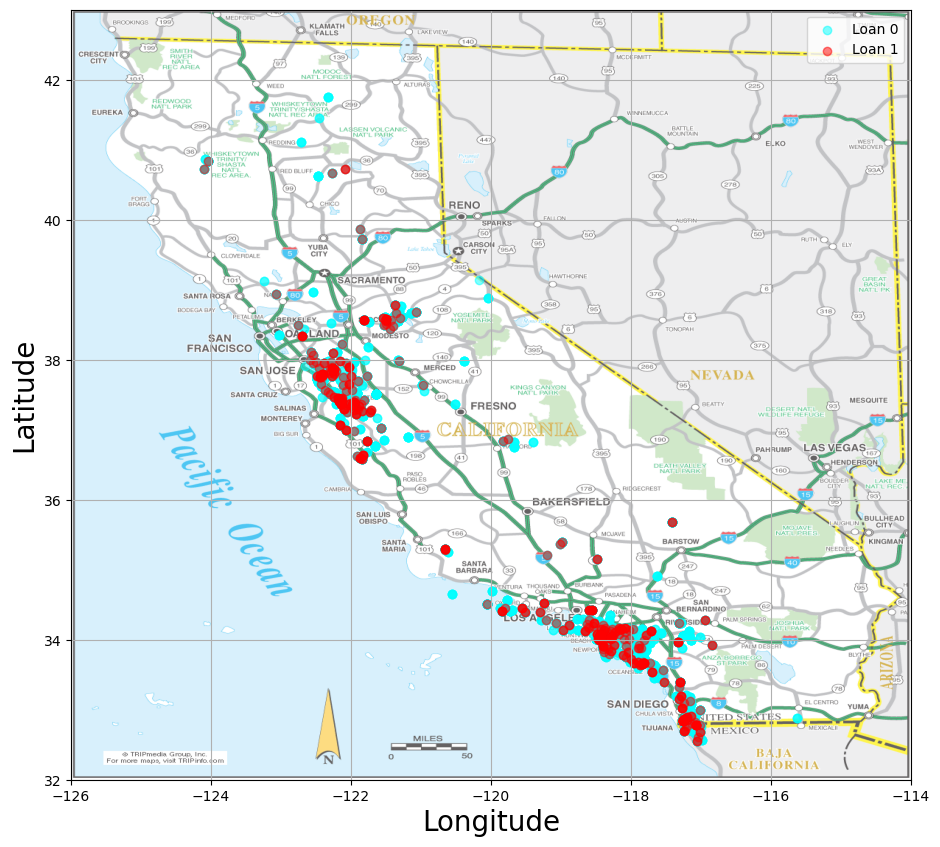

In [69]:
img = plt.imread('E:/Programming/MLMomeni/ML/files/CA.webp')
target_0 = df_for_maping[df_for_maping["Personal Loan"]==0]
target_1 = df_for_maping[df_for_maping["Personal Loan"]==1]
fig , axs = plt.subplots(figsize=(15,10))
axs.imshow(img, extent=[-126, -114, 32, 43], alpha= .7)

axs.scatter(target_0['Longitude'],target_0['Latitude'],c='cyan',alpha=.5,label='Loan 0')
axs.scatter(target_1['Longitude'],target_1['Latitude'],c='r',alpha=.5,label='Loan 1')
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.grid()
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Age')

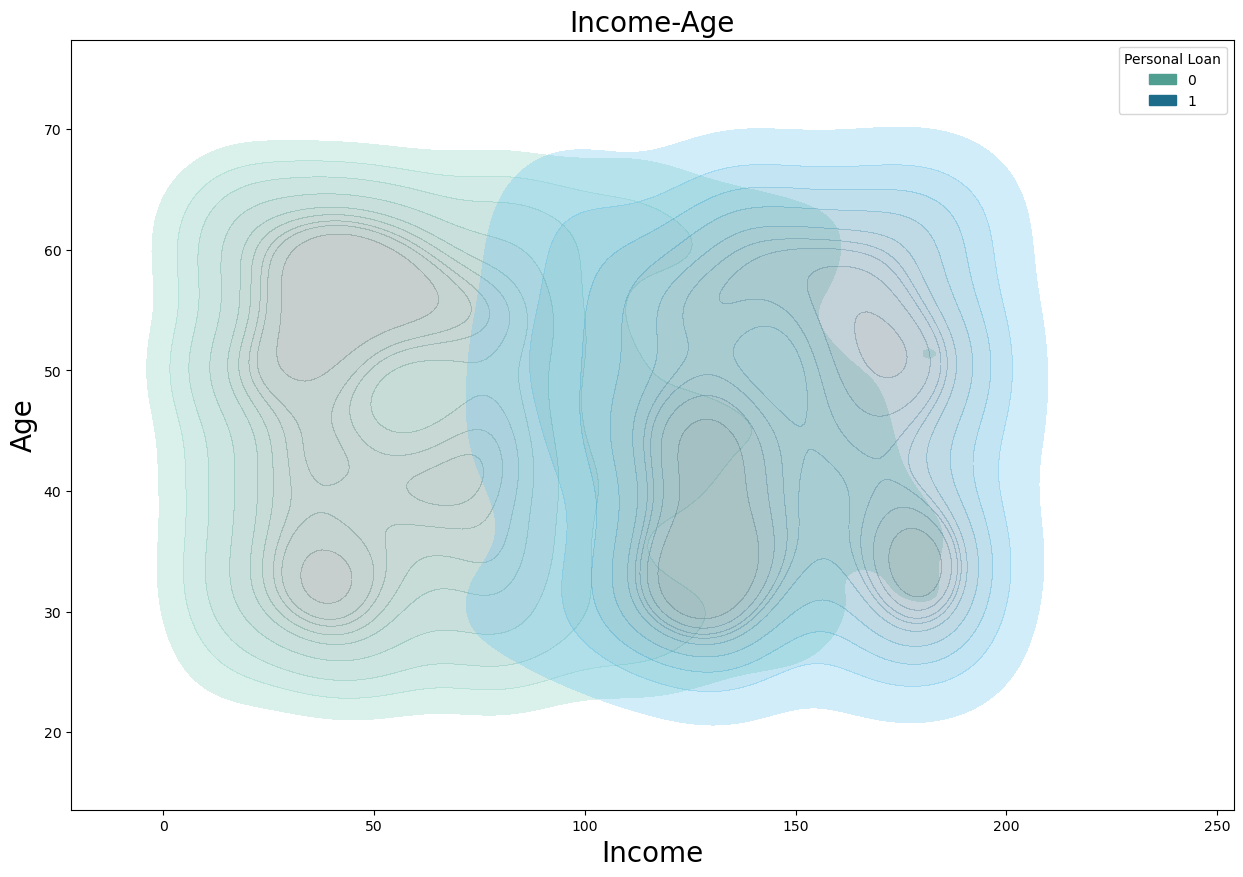

In [80]:
plt.figure(figsize = (15,10))
sns.kdeplot(data = df ,x= 'Income', y = 'Age', hue= "Personal Loan", shade= True, fill= True, common_norm= False, palette= "crest", alpha=.3, linewidth=0)
plt.title("Income-Age", fontsize =20)
plt.xlabel("Income", fontsize =20)
plt.ylabel("Age", fontsize =20)

In [99]:
x = df.drop(columns=['Personal Loan', 'Place'])
y = df['Personal Loan'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2 , random_state =0)

## LogReg

In [84]:
logreg = LogisticRegression(solver='liblinear', C=50)
logreg.fit(x_train, y_train.ravel())
y_pred = logreg.predict(x_test)
print('Accuracy : ',metrics.accuracy_score(y_test, y_pred))
print('f1 score : ',metrics.f1_score(y_test, y_pred))

Accuracy :  0.909
f1 score :  0.4052287581699347


In [92]:
def Logreg(X,y,testsize):
    df_evaluation=pd.DataFrame()
    for x in testsize:
        X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = x, random_state = 0)
        logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        dict = {'testsize': x, 'acc':metrics.accuracy_score(y_test, y_pred),'score':logreg.score(X,y)}
        df_evaluation = df_evaluation.append(dict, ignore_index = True)
    return(X_train, X_test, y_train, y_test, y_pred, df_evaluation)
def highlight_max(s):
    is_max = s ==s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [93]:
df_r = df
X=df_r.drop(columns=['Personal Loan', 'Place'])
y=df_r['Personal Loan']

In [95]:
X_train, X_test, y_train, y_test, y_pred, df_evaluation = Logreg(X,y,[.1,.15,.2,.25,.3,.35,.4])
df_evaluation.style.apply(highlight_max)

,testsize,acc,score
0,0.100000,0.884000,0.894579
1,0.150000,0.898667,0.894979
2,0.200000,0.903000,0.894179
3,0.250000,0.898400,0.892378
4,0.300000,0.895333,0.893179
5,0.350000,0.894286,0.892979
6,0.400000,0.891500,0.890578


In [100]:
logreg = LogisticRegression(solver='liblinear', C=50)
logreg.fit(x_train, y_train.ravel())
y_pred = logreg.predict(x_test)
print('Accuracy : ',metrics.accuracy_score(y_test, y_pred))
print('f1 score : ',metrics.f1_score(y_test, y_pred))

Accuracy :  0.909
f1 score :  0.4052287581699347


In [101]:
confusion_matrix(y_test,y_pred)

array([[878,  21],
       [ 70,  31]], dtype=int64)

## KNN

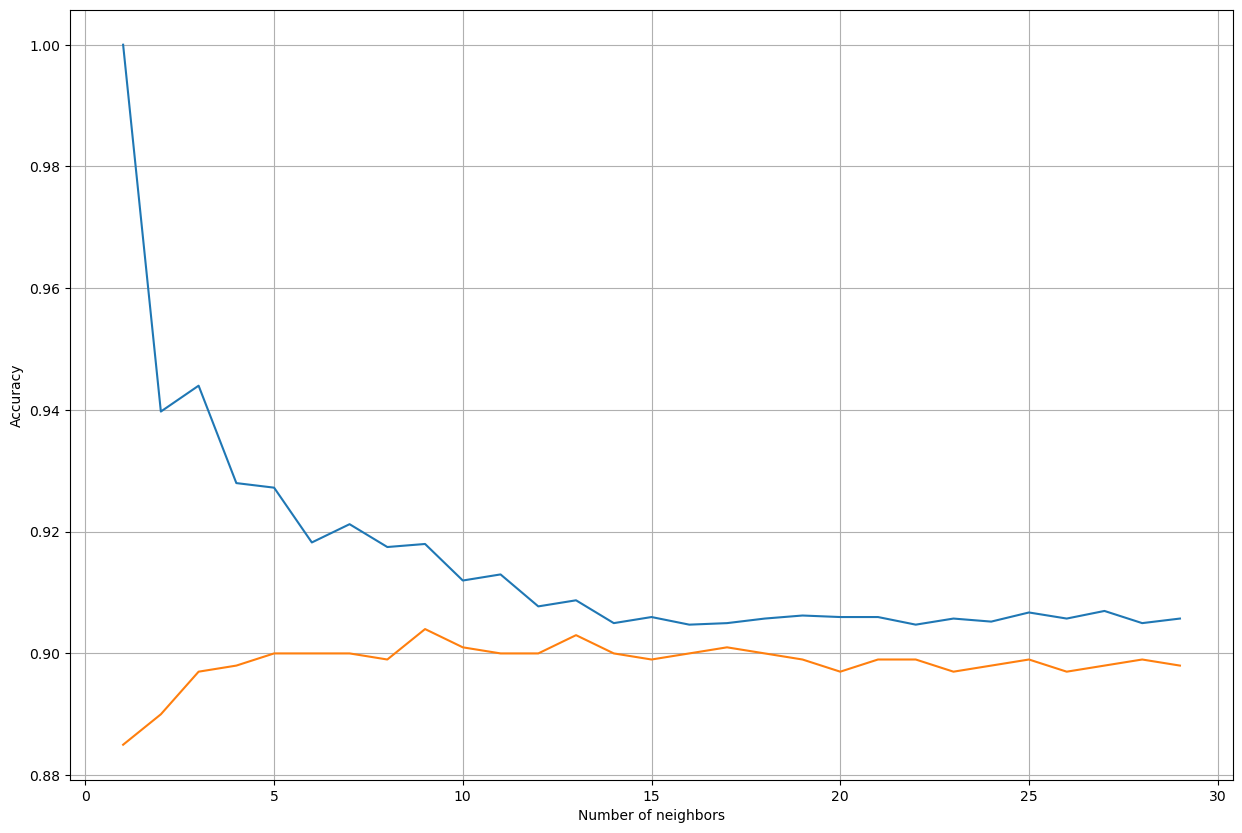

In [107]:
tracc = []
testacc = []
neighbors_settings = range(1,30)
for n_neighbors in neighbors_settings:
    knn_model = KNN(n_neighbors = n_neighbors)
    knn_model.fit(x_train, y_train.ravel())
    tracc.append(knn_model.score(x_train, y_train))
    testacc.append(knn_model.score(x_test, y_test))
    
plt.figure(figsize=(15,10))
plt.plot(neighbors_settings, tracc, label = 'accuracy of train')
plt.plot(neighbors_settings, testacc, label = 'accuracy of test')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.grid()
plt.show()

In [125]:
K = 13
clf = KNN(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc
cm = confusion_matrix(y_test , y_pred)
cm

array([[895,   4],
       [ 93,   8]], dtype=int64)

## Naive bayes

In [127]:
x = df.drop(columns=['Personal Loan', 'Place', 'Longitude', 'Latitude'])
y = df['Personal Loan'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2 , random_state =0)
clf = ComplementNB()
clf.fit(x_train , y_train.ravel())
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.775

lame

In [128]:
df['Personal Loan'].value_counts()

0    4519
1     480
Name: Personal Loan, dtype: int64